In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import imageio
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Baseline MSF 


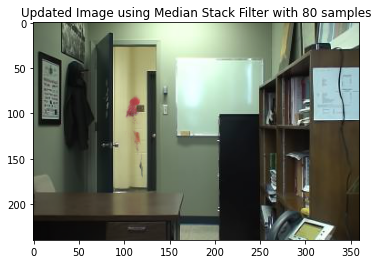

In [ ]:
import numpy as np
import glob
import pylab as plt
import imageio
files = glob.glob('/content/drive/MyDrive/dataset/baseline/office/input/*.jpg')

imagenames_list = []
for f in files:
    imagenames_list.append(f)
    imagenames_list.sort()

read_images = []
for n in range(0,80):
    image_in = imageio.imread(imagenames_list[n + 560],format='jpg')
    read_images.append(image_in)

rows = read_images[0][:,:,0].shape[0]
cols = read_images[0][:,:,0].shape[1]
updated_img = np.zeros_like(read_images[0])
channel = 3

for i in range(rows):
    for j in range(cols):
        for c in range(channel):
                value = np.zeros(len(read_images))
                for k in range(len(read_images)):
                    value[k] = read_images[k][i, j, c]
                updated_img[i, j, c] = np.median(value)

plt.title('Updated Image using Median Stack Filter with '+str(len(read_images))+' samples')
plt.imshow(updated_img)
plt.show()

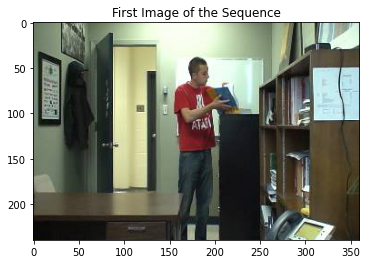

In [ ]:
plt.title('First Image of the Sequence')
plt.imshow(read_images[-1])

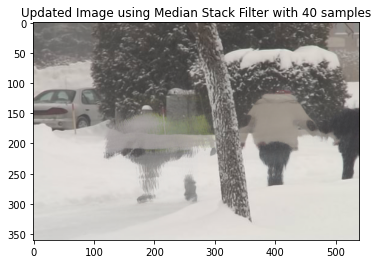

In [ ]:
import numpy as np
import glob
import pylab as plt
import imageio
files = glob.glob('/content/drive/MyDrive/dataset/badWeather/skating/input/*.jpg')

imagenames_list = []
for f in files:
    imagenames_list.append(f)

imagenames_list.sort()

read_images = []
for n in range(0,40):
    image_in = imageio.imread(imagenames_list[n + 560],format='jpg')
    read_images.append(image_in)

rows = read_images[0][:,:,0].shape[0]
cols = read_images[0][:,:,0].shape[1]
updated_img = np.zeros_like(read_images[0])
channel = 3

for i in range(rows):
    for j in range(cols):
        for c in range(channel):
                value = np.zeros(len(read_images))
                for k in range(len(read_images)):
                    value[k] = read_images[k][i, j, c]
                updated_img[i, j, c] = np.median(value)

plt.title('Updated Image using Median Stack Filter with '+str(len(read_images))+' samples')
plt.imshow(updated_img)
plt.show()

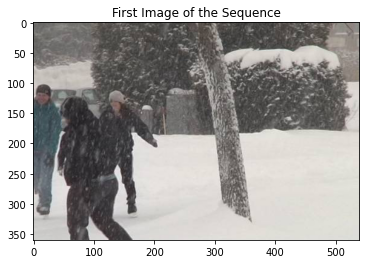

In [ ]:
plt.title('First Image of the Sequence')
plt.imshow(read_images[-1])

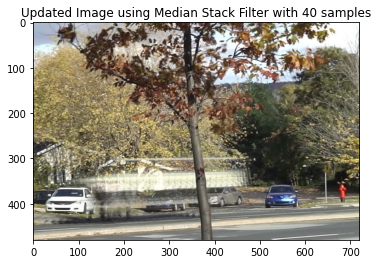

In [ ]:
import numpy as np
import glob
import pylab as plt
import imageio
files = glob.glob('/content/drive/MyDrive/dataset/dynamicBackground/fall/input/*.jpg')

imagenames_list = []
for f in files:
    imagenames_list.append(f)

imagenames_list.sort()

read_images = []
for n in range(0,40):
    image_in = imageio.imread(imagenames_list[n + 560],format='jpg')
    read_images.append(image_in)

rows = read_images[0][:,:,0].shape[0]
cols = read_images[0][:,:,0].shape[1]
updated_img = np.zeros_like(read_images[0])
channel = 3

for i in range(rows):
    for j in range(cols):
        for c in range(channel):
                value = np.zeros(len(read_images))
                for k in range(len(read_images)):
                    value[k] = read_images[k][i, j, c]
                updated_img[i, j, c] = np.median(value)

plt.title('Updated Image using Median Stack Filter with '+str(len(read_images))+' samples')
plt.imshow(updated_img)
plt.show()

In [ ]:
plt.title('First Image of the Sequence')
plt.imshow(read_images[-1])

# Pipeline

Skating

In [ ]:
files = glob.glob('/content/drive/MyDrive/dinoOutput/skating/attention/*.jpg')

mask_imagenames_list = []
for f in files:
    mask_imagenames_list.append(f)

In [ ]:
read_masks = []
for n in range(0,40):
    image_in = imageio.imread(mask_imagenames_list[n],format='jpg')
    read_masks.append(image_in)

shape = read_masks[0].shape

for i in range(0, len(read_masks)):

  img = cv2.cvtColor(read_masks[i], cv2.COLOR_BGR2GRAY)
  th, im_gray_th_otsu = cv2.threshold(img, 128, 192, cv2.THRESH_OTSU)
  img = im_gray_th_otsu

  countours, heirarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  threshold_blobs_size = 8000.0

  for j in range(1, len(countours)):

    index_level = int(heirarchy[0][j][1])

    if index_level <= j:

      cnt = countours[j]
      area = cv2.contourArea(cnt)

      if area <= threshold_blobs_size:
        cv2.drawContours(img, [cnt], -1, (0, 0, 0), 2)

  col = np.zeros(shape)
  col[:,:,0] = img
  col[:,:,1] = img
  col[:,:,2] = img

  read_masks[i] = col

plt.imshow(read_masks[26], cmap='gray')
#print(read_masks[7].shape)

['/content/drive/MyDrive/dataset/badWeather/skating/input/in000001.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000002.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000003.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000004.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000005.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000006.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000007.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000008.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000009.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000010.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000011.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000012.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in000013.jpg', '/content/drive/MyDrive/dataset/badWeather/skating/input/in0000

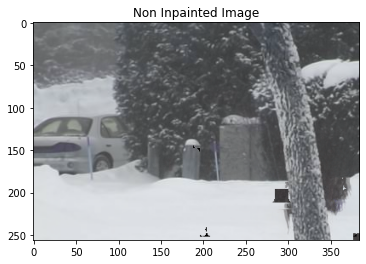

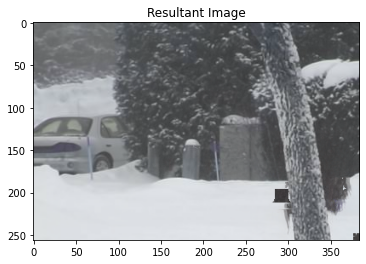

In [ ]:
files = glob.glob('/content/drive/MyDrive/dataset/badWeather/skating/input/*.jpg')
imagenames_list = []
for f in files:
  imagenames_list.append(f)
  imagenames_list.sort()

print(imagenames_list)

tmp_im = cv2.imread(mask_imagenames_list[0])
valid_p_bin = [[[] for col in range(0,len(tmp_im[row]))] for row in range(0,len(tmp_im))]

for n in range(0, 40):
  mask_in = read_masks[n]

  image_in = cv2.imread(imagenames_list[n])
  image_in = image_in[:256,:384,]

  for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
      cur_mask_p = mask_in[row][col]
      # print(cur_mask_p)
      if cur_mask_p[0] < 5 and cur_mask_p[1] < 5 and cur_mask_p[2] < 5:
                    #no change detected
        valid_p_bin[row][col].append(image_in[row][col])
                #if cur_mask_p[0] != 255 and cur_mask_p[1] != 255 and cur_mask_p[2] != 255:
                #    valid_p_bin[row][col].append(image_in[row][col])

    #some temporary result:
result_image = np.zeros_like(tmp_im)
hidden_mask = np.zeros_like(tmp_im)
print(hidden_mask.shape)
for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
        if len(valid_p_bin[row][col]) != 0:
                #result_image[row][col] = valid_p_bin[row][col][random.randint(0,len(valid_p_bin[row][col])-1)]
            for chan in range(0,3):
                result_image[row][col][chan] = np.median([valid_p_bin[row][col][i][chan] for i in range(0,len(valid_p_bin[row][col]))])


                #result_image[row][col] = valid_p_bin[row][col][0]
        else:
            hidden_mask[row][col] = 255
cv2.imwrite('maskfilter.png', result_image)
cv2.imwrite('hiddenmask.png', hidden_mask)
dst = cv2.inpaint(result_image, cv2.imread('hiddenmask.png',cv2.IMREAD_GRAYSCALE), 3, cv2.INPAINT_TELEA)
outfilename = 'inpaintmaskfilter.png'
    # Write the output.
cv2.imwrite(outfilename, dst)

plt.figure(1)
plt.title('Non Inpainted Image')
plt.imshow(result_image)

plt.figure(2)
plt.title('Resultant Image')
plt.imshow(dst)

Office

In [ ]:
files = glob.glob('/content/drive/MyDrive/dinoOutput/office/attention/*.jpg')

mask_imagenames_list = []
for f in files:
    mask_imagenames_list.append(f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


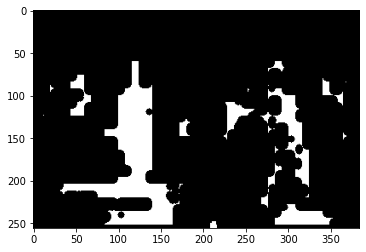

In [ ]:
read_masks = []
for n in range(0,80):
    image_in = imageio.imread(mask_imagenames_list[n + 560],format='jpg')
    read_masks.append(image_in)

shape = read_masks[0].shape

for i in range(0, len(read_masks)):

  img = cv2.cvtColor(read_masks[i], cv2.COLOR_BGR2GRAY)
  th, im_gray_th_otsu = cv2.threshold(img, 128, 192, cv2.THRESH_OTSU)
  img = im_gray_th_otsu

  countours, heirarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  threshold_blobs_size = 30000.0

  for j in range(1, len(countours)):

    index_level = int(heirarchy[0][j][1])

    if index_level <= j:

      cnt = countours[j]
      area = cv2.contourArea(cnt)

      if area <= threshold_blobs_size:
        cv2.drawContours(img, [cnt], -1, (0, 0, 0), 5)

  col = np.zeros(shape)
  col[:,:,0] = img
  col[:,:,1] = img
  col[:,:,2] = img

  read_masks[i] = col

plt.imshow(read_masks[50], cmap='gray')
#print(read_masks[7].shape)

(256, 384, 3)


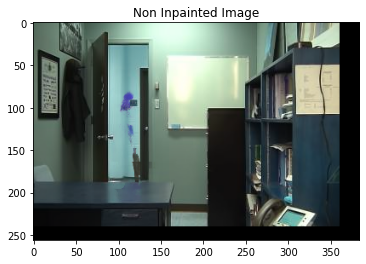

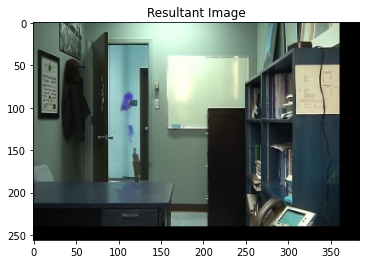

In [ ]:
files = glob.glob('/content/drive/MyDrive/dataset/baseline/office/input/*.jpg')
imagenames_list = []
for f in files:
  imagenames_list.append(f)
  imagenames_list.sort()

#print(imagenames_list)

tmp_im = cv2.imread(mask_imagenames_list[0])
valid_p_bin = [[[] for col in range(0,len(tmp_im[row]))] for row in range(0,len(tmp_im))]

for n in range(0, 80):
  mask_in = read_masks[n]

  image_in = cv2.imread(imagenames_list[n + 560])
  image_in = image_in[:256,:384,]

  for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
      cur_mask_p = mask_in[row][col]
      # print(cur_mask_p)
      if cur_mask_p[0] < 5 and cur_mask_p[1] < 5 and cur_mask_p[2] < 5:
                    #no change detected
        valid_p_bin[row][col].append(image_in[row][col])
                #if cur_mask_p[0] != 255 and cur_mask_p[1] != 255 and cur_mask_p[2] != 255:
                #    valid_p_bin[row][col].append(image_in[row][col])

    #some temporary result:
result_image = np.zeros_like(tmp_im)
hidden_mask = np.zeros_like(tmp_im)
print(hidden_mask.shape)
for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
        if len(valid_p_bin[row][col]) != 0:
                #result_image[row][col] = valid_p_bin[row][col][random.randint(0,len(valid_p_bin[row][col])-1)]
            for chan in range(0,3):
                result_image[row][col][chan] = np.median([valid_p_bin[row][col][i][chan] for i in range(0,len(valid_p_bin[row][col]))])


                #result_image[row][col] = valid_p_bin[row][col][0]
        else:
            hidden_mask[row][col] = 255
cv2.imwrite('maskfilter.png', result_image)
cv2.imwrite('hiddenmask.png', hidden_mask)
dst = cv2.inpaint(result_image, cv2.imread('hiddenmask.png',cv2.IMREAD_GRAYSCALE), 3, cv2.INPAINT_TELEA)
outfilename = 'inpaintmaskfilter.png'
    # Write the output.
cv2.imwrite(outfilename, dst)

plt.figure(1)
plt.title('Non Inpainted Image')
plt.imshow(result_image)

plt.figure(2)
plt.title('Resultant Image')
plt.imshow(dst)

Fall

In [ ]:
files = glob.glob('/content/drive/MyDrive/dinoOutput/fall/attention/*.jpg')

mask_imagenames_list = []
for f in files:
    mask_imagenames_list.append(f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


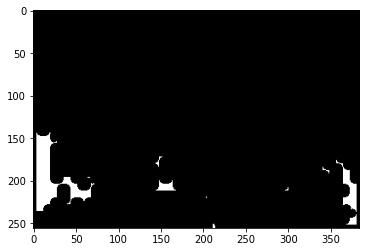

In [ ]:
read_masks = []
for n in range(0,80):
    image_in = imageio.imread(mask_imagenames_list[n + 560],format='jpg')
    read_masks.append(image_in)

shape = read_masks[0].shape

for i in range(0, len(read_masks)):

  img = cv2.cvtColor(read_masks[i], cv2.COLOR_BGR2GRAY)
  th, im_gray_th_otsu = cv2.threshold(img, 128, 192, cv2.THRESH_OTSU)
  img = im_gray_th_otsu

  countours, heirarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  threshold_blobs_size = 30000.0

  for j in range(1, len(countours)):

    index_level = int(heirarchy[0][j][1])

    if index_level <= j:

      cnt = countours[j]
      area = cv2.contourArea(cnt)

      if area <= threshold_blobs_size:
        cv2.drawContours(img, [cnt], -1, (0, 0, 0), 5)

  col = np.zeros(shape)
  col[:,:,0] = img
  col[:,:,1] = img
  col[:,:,2] = img

  read_masks[i] = col

plt.imshow(read_masks[50], cmap='gray')
#print(read_masks[7].shape)

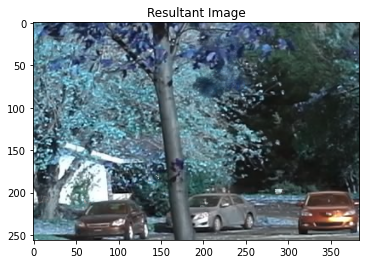

In [ ]:
files = glob.glob('/content/drive/MyDrive/dataset/dynamicBackground/fall/input/*.jpg')
imagenames_list = []
for f in files:
  imagenames_list.append(f)
  imagenames_list.sort()

#print(imagenames_list)

tmp_im = cv2.imread(mask_imagenames_list[0])
valid_p_bin = [[[] for col in range(0,len(tmp_im[row]))] for row in range(0,len(tmp_im))]

for n in range(0, 80):
  mask_in = read_masks[n]
  #print(mask_in.shape)

  image_in = cv2.imread(imagenames_list[n + 560])
  image_in = image_in[160:416,200:584,]

  for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
      cur_mask_p = mask_in[row][col]
      # print(cur_mask_p)
      if cur_mask_p[0] < 5 and cur_mask_p[1] < 5 and cur_mask_p[2] < 5:
                    #no change detected
        valid_p_bin[row][col].append(image_in[row][col])
                #if cur_mask_p[0] != 255 and cur_mask_p[1] != 255 and cur_mask_p[2] != 255:
                #    valid_p_bin[row][col].append(image_in[row][col])

    #some temporary result:
result_image = np.zeros_like(tmp_im)
hidden_mask = np.zeros_like(tmp_im)

for row in range(0,len(image_in)):
    for col in range(0,len(image_in[row])):
        if len(valid_p_bin[row][col]) != 0:
                #result_image[row][col] = valid_p_bin[row][col][random.randint(0,len(valid_p_bin[row][col])-1)]
            for chan in range(0,3):
                result_image[row][col][chan] = np.median([valid_p_bin[row][col][i][chan] for i in range(0,len(valid_p_bin[row][col]))])


                #result_image[row][col] = valid_p_bin[row][col][0]
        else:
            hidden_mask[row][col] = 255
cv2.imwrite('maskfilter.png', result_image)
cv2.imwrite('hiddenmask.png', hidden_mask)
dst = cv2.inpaint(result_image, cv2.imread('hiddenmask.png',cv2.IMREAD_GRAYSCALE), 3, cv2.INPAINT_NS)
outfilename = 'inpaintmaskfilter.png'
    # Write the output.
cv2.imwrite(outfilename, dst)

plt.figure(1)
plt.title('Resultant Image')
plt.imshow(dst)

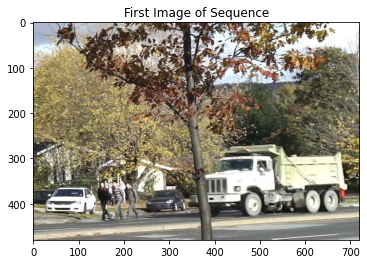

In [ ]:
first = plt.imread(imagenames_list[560])
plt.imshow(first)
plt.title('First Image of Sequence')
plt.show()